In [1]:
import mlrose_hiive as mlrose

In [2]:
import pkgutil
import mlrose_hiive.generators

def list_generator_files(module):
    package_path = module.__path__
    for _, module_name, is_pkg in pkgutil.iter_modules(package_path):
        print(module_name)
        if is_pkg:
            sub_module = f"{module.__name__}.{module_name}"
            list_generator_files(__import__(sub_module, fromlist=[""]))

# List all generator files
list_generator_files(mlrose_hiive.generators)

continuous_peaks_generator
flip_flop_generator
four_peaks_generator
knapsack_generator
max_k_color_generator
one_max_generator
queens_generator
tsp_generator


In [3]:
from mlrose_hiive.generators import four_peaks_generator

In [11]:
from mlrose_hiive.generators.four_peaks_generator import FourPeaksGenerator

In [5]:
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [6]:
import sklearn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from mlrose_hiive.fitness._discrete_peaks_base import _DiscretePeaksBase

#### Notes for mlrose-hiive library:
- rhc.py, sa.py, ga.py -- core implementations for those algos
- **Runners** -- utility classes used to streamline those **algos** executions. Manage configs, run experiments, collect results and have interface for easy execution
- **Generators** -- used to generate initial states or problem instances for the **optimization process**. Help create the initial config needed to start the optimization process. 

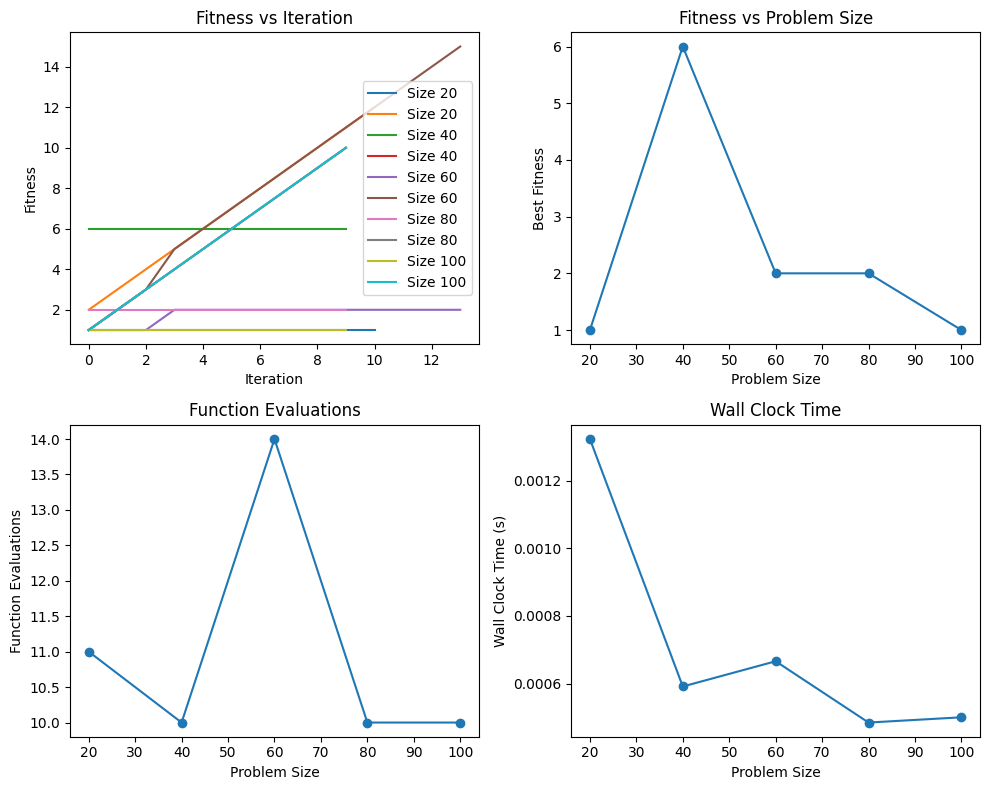

In [5]:
# Define a function to run the experiment
def run_rhc_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)

    # Run RHC
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()

    # Gather results
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_experiment(size)
    results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')

plt.tight_layout()
plt.show()


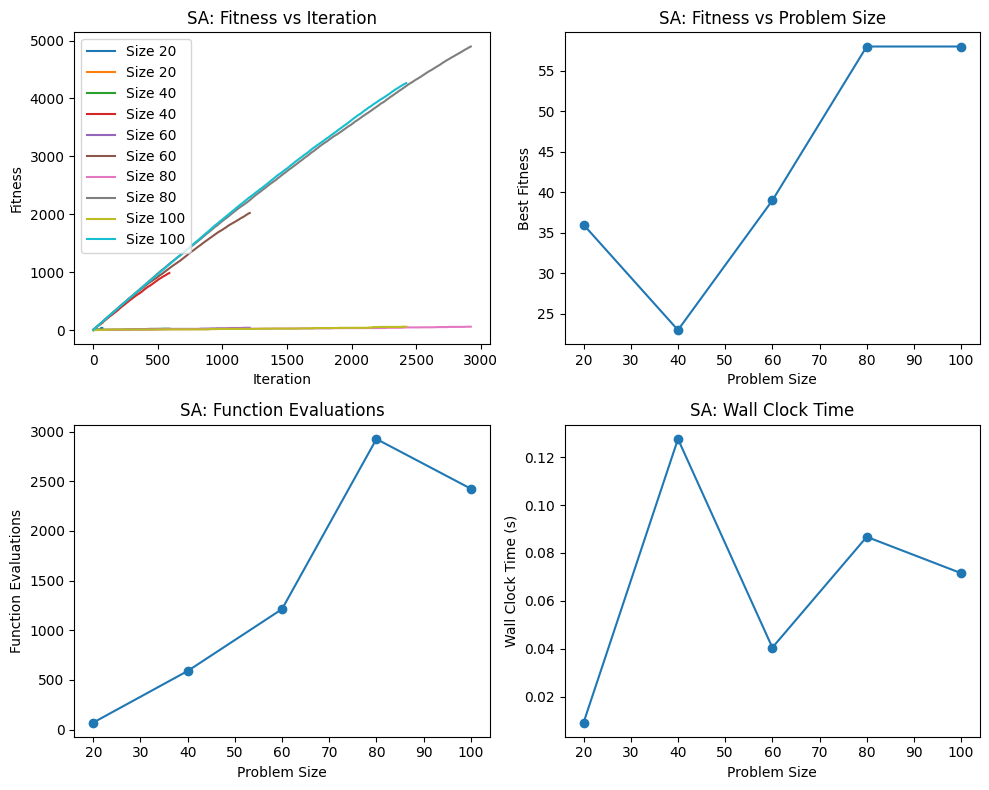

In [6]:
# Function to run SA experiment
def run_sa_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    schedule = mlrose.ExpDecay()
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
sa_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for SA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('SA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('SA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('SA: Wall Clock Time')

plt.tight_layout()
plt.show()


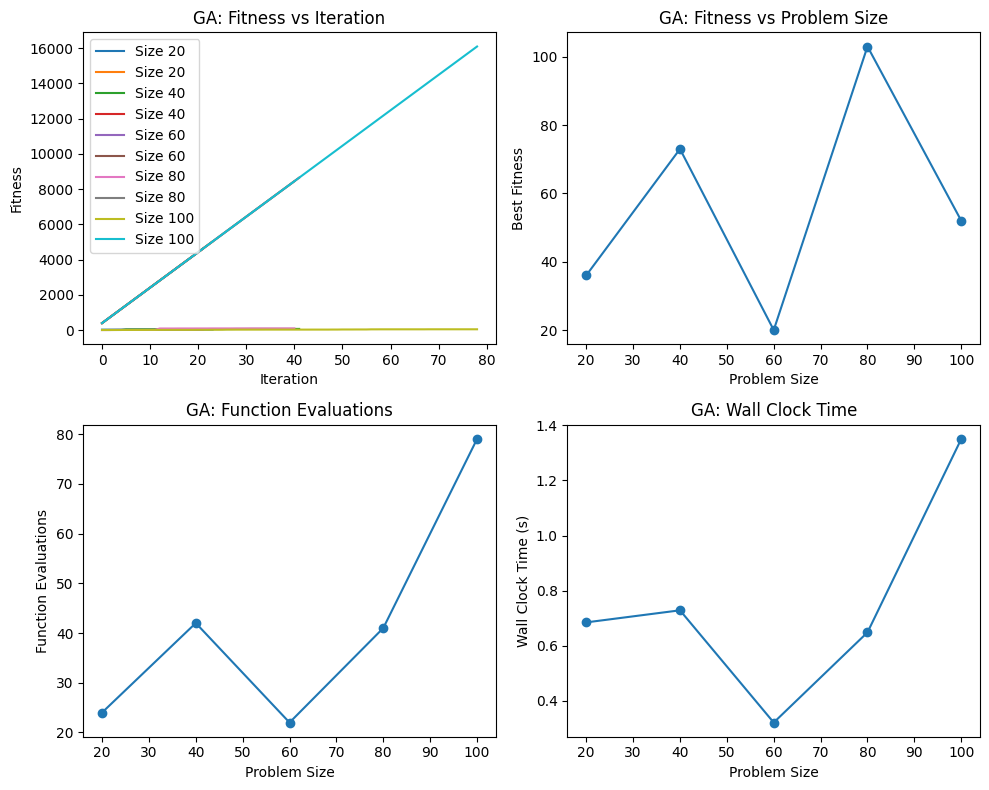

In [7]:
# Function to run GA experiment
def run_ga_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for GA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('GA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('GA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('GA: Wall Clock Time')

plt.tight_layout()
plt.show()


#### Basic experiment without generator or runners, a naive run to see how RHC, SA, GA performs on 4peaks

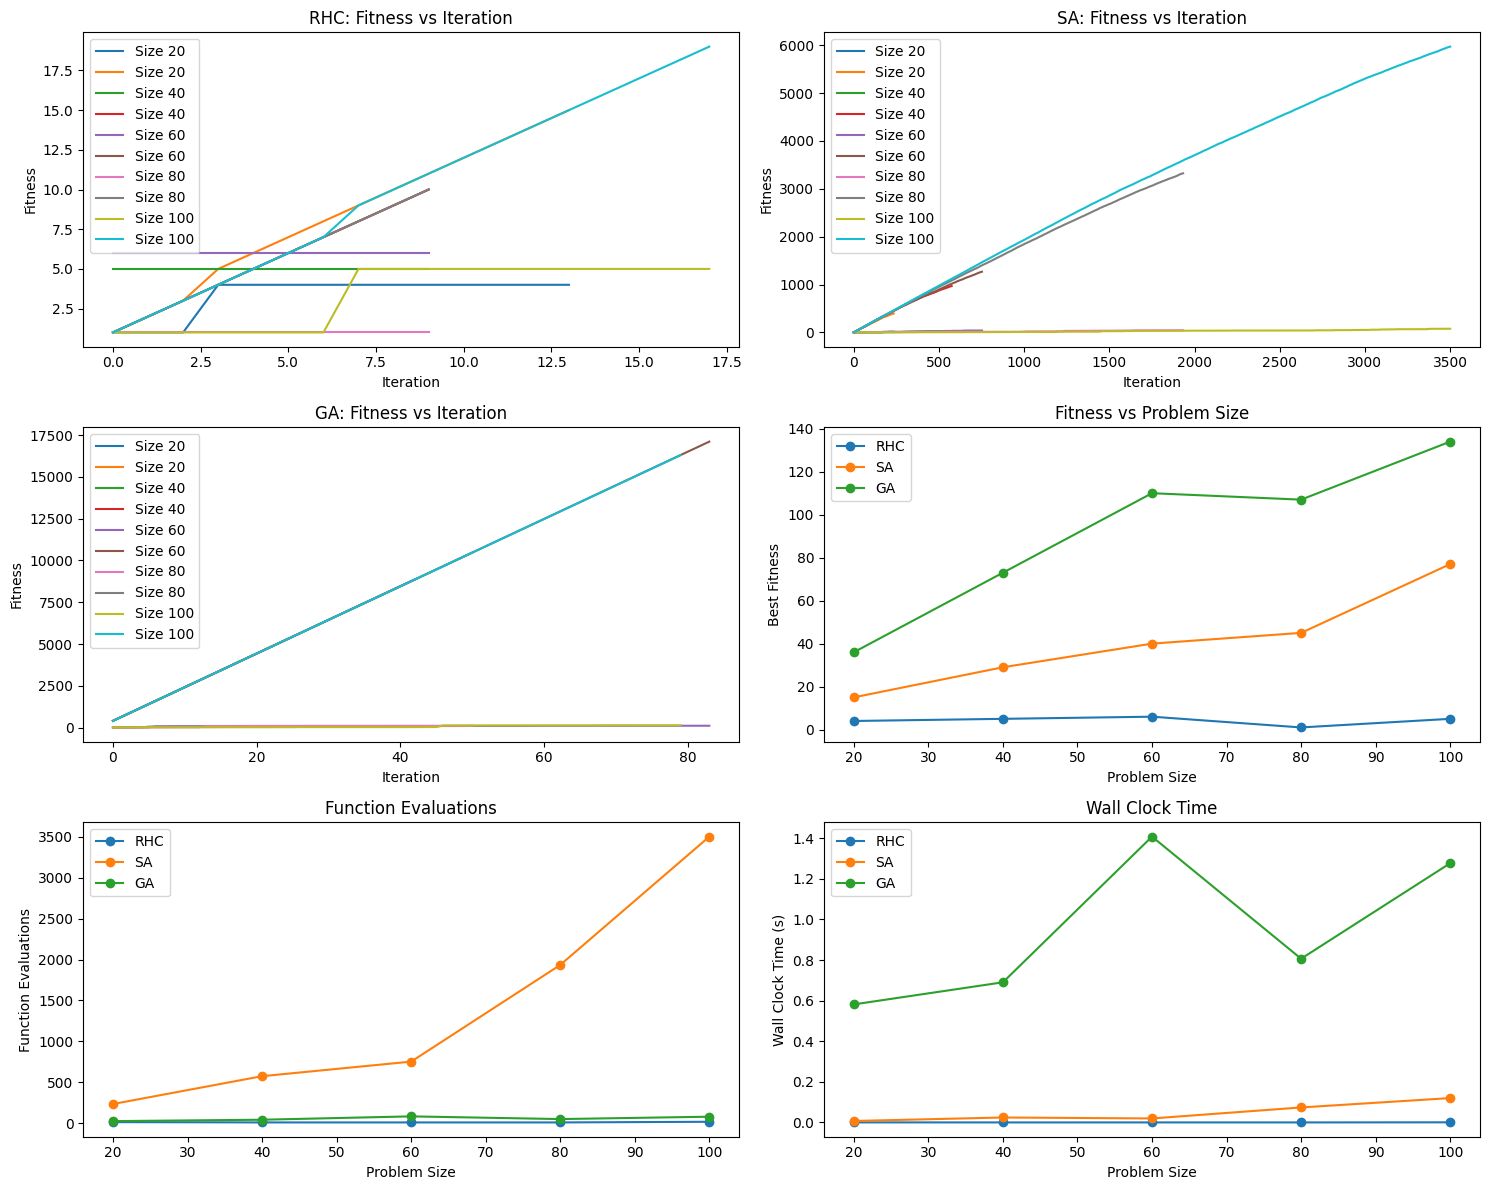

In [8]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
rhc_results = []
sa_results = []
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


Running experiments: 100%|███████████████████████| 5/5 [15:50<00:00, 190.07s/it]


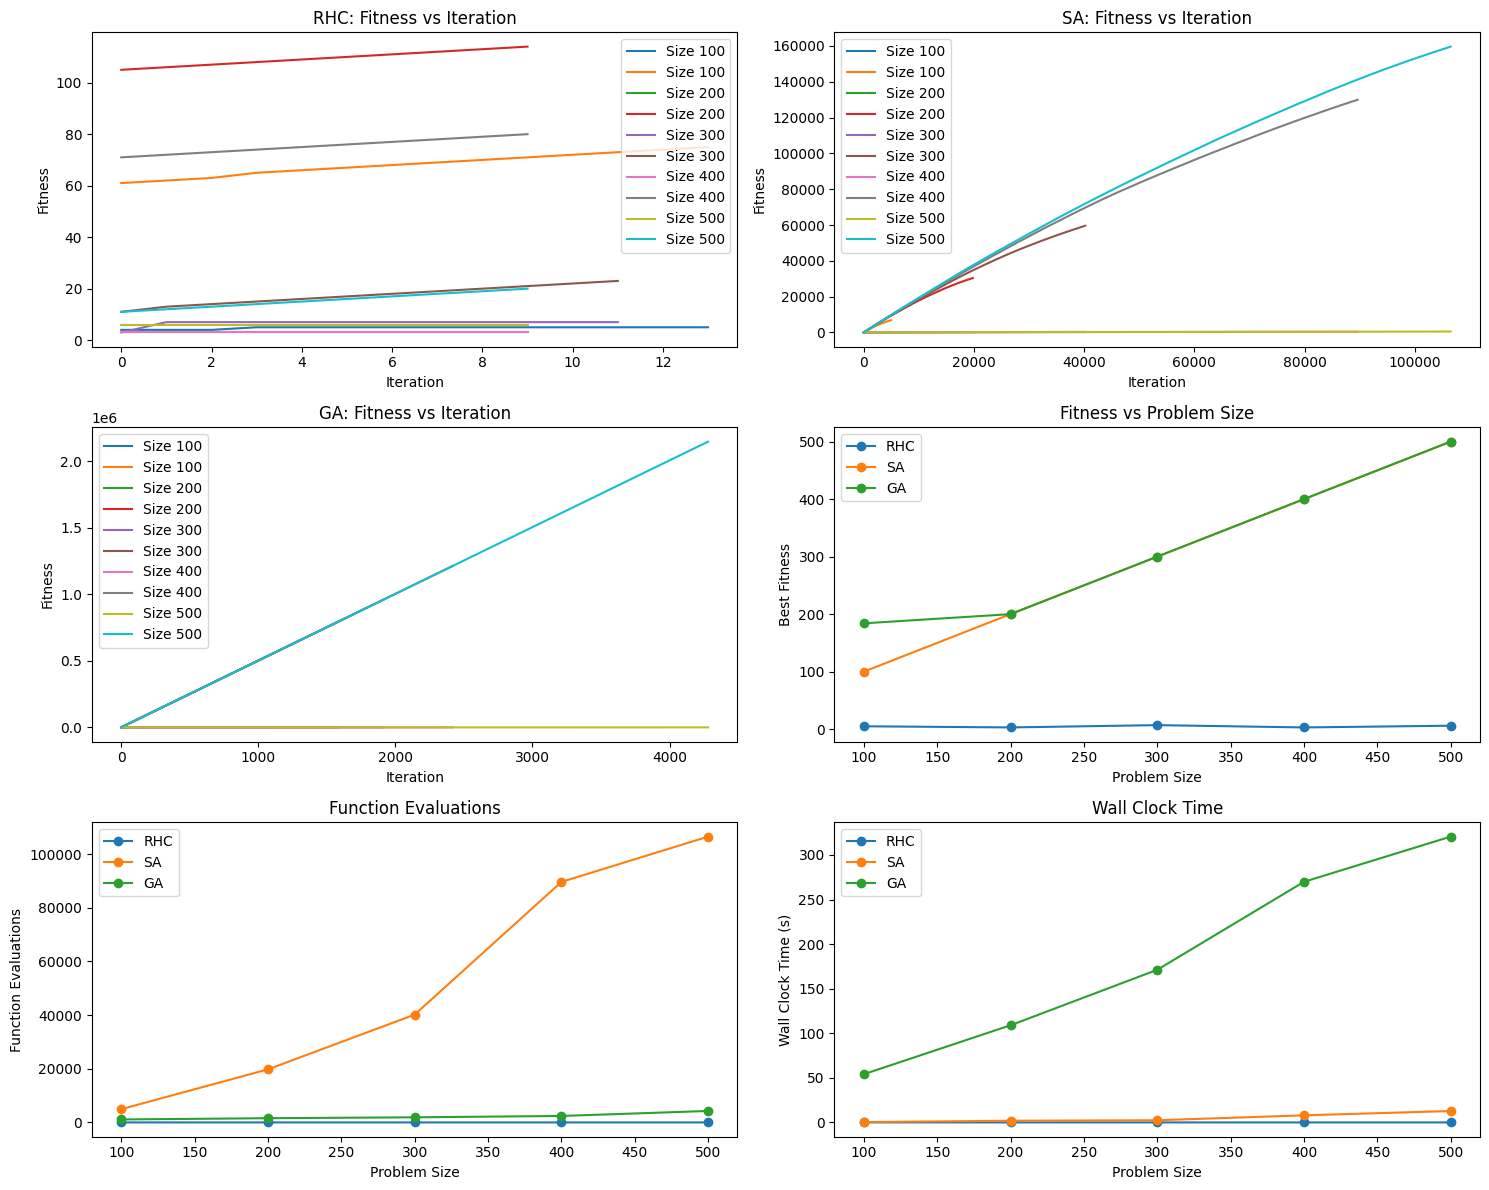

In [11]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts=10, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=500, mutation_prob=0.2, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [100, 200, 300, 400, 500]
rhc_results = []
sa_results = []
ga_results = []

for size in tqdm(problem_sizes, desc="Running experiments"):
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration for RHC
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for SA
plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for GA
plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


These graphs tell me that: 
- RHC struggles to find high fitness values, even as the problem size increases. The fitness improves slowly. 
- SA finds higher fitness values compared to RHC, but it takes longer and improves its fitness steadily over iterations.
- GA finds the highest fitness quickly and efficiently, which means it's efficient in finding the optimal solution for larger problem sizes. 

In terms of **problem size**: 
- GA consistently outperforms RHC and SA, especially for larger problem size. SA performs better than RHC for larger problem size. 

In terms of **FEvals**: 
- GA takes the longest, especially as problem size increases. RHC is the fastest.

SA seems to be the best balanced in terms of performance but requires more evaluation. Compared to RHC, it's more effective, but faster. Compared to GA, it's faster, but isn't as optimal. 

#### first, define 4peaks with the generator class - seed 428

The below code is taken directly from the mlrose-hiive library. The four-peaks generator class wasn't installed so pasting it here directly is my workaround.

In [12]:
# problem_size = 100
fourpeaks_problem_100 = FourPeaksGenerator.generate(seed=428, size=100)
fourpeaks_problem_50 = FourPeaksGenerator.generate(seed=428, size=50)
fourpeaks_problem_25= FourPeaksGenerator.generate(seed=428, size=25)

### Simulated Annealing (SA)

#### begin with seed = 55

In [40]:
from mlrose_hiive import SARunner

In [36]:
from IPython.core.display import display, HTML 

In [39]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_50,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
sa_run_stats

Iteration  Fitness  FEvals      Time  \
0            0      1.0       0  0.000214   
1            1      1.0       2  0.011106   
2            2      1.0       4  0.022604   
3            4      1.0       8  0.117770   
4            8      1.0      16  0.120730   
..         ...      ...     ...       ...   
190        128      5.0     256  0.284367   
191        256      0.0     511  0.332694   
192        512      0.0    1022  0.423363   
193       1024     21.0    1948  0.633014   
194       2048     94.0    3300  1.269030   

                                                 State schedule_type  \
0    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...     geometric   
1    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...     geometric   
2    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...     geometric   
3    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...     geometric   
4    [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...     geometric   
..                                                 ...           ...   
190  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, ...     geometric   
191  [0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, ...     geometric   
192  [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, ...     geometric   
193  [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...     geometric   
194  [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...     geometric   

     schedule_init_temp  schedule_decay  schedule_min_temp  \
0                   0.1            0.99              0.001   
1                   0.1            0.99              0.001   
2                   0.1            0.99              0.001   
3                   0.1            0.99              0.001   
4                   0.1            0.99              0.001   
..                  ...             ...                ...   
190              1000.0            0.99              0.001   
191              1000.0            0.99              0.001   
192              1000.0            0.99              0.001   
193              1000.0            0.99              0.001   
194              1000.0            0.99              0.001   

     schedule_current_value Temperature  max_iters  
0                  0.100000         0.1       2048  
1                  0.099989         0.1       2048  
2                  0.099977         0.1       2048  
3                  0.099882         0.1       2048  
4                  0.099879         0.1       2048  
..                      ...         ...        ...  
190              997.146096      1000.0       2048  
191              996.661901      1000.0       2048  
192              995.754094      1000.0       2048  
193              993.658190      1000.0       2048  
194              987.326816      1000.0       2048  

[195 rows x 12 columns]

In [40]:
sa_run_curves

Iteration      Time  Fitness  FEvals Temperature  max_iters
0              0  0.000214      1.0     0.0         0.1       2048
1              1  0.011106      1.0     2.0         0.1       2048
2              2  0.022604      1.0     4.0         0.1       2048
3              3  0.117674      1.0     6.0         0.1       2048
4              4  0.117770      1.0     8.0         0.1       2048
...          ...       ...      ...     ...         ...        ...
24794       2044  0.094142     94.0  3296.0      1000.0       2048
24795       2045  0.094291     94.0  3297.0      1000.0       2048
24796       2046  0.094440     94.0  3298.0      1000.0       2048
24797       2047  0.094590     94.0  3299.0      1000.0       2048
24798       2048  0.094739     94.0  3300.0      1000.0       2048

[24799 rows x 6 columns]

In [41]:
sa_run_curves.describe()

Iteration          Time       Fitness        FEvals  max_iters
count  24799.000000  24799.000000  24799.000000  24799.000000    24799.0
mean     844.310577      0.468473     49.156135   1429.820759     2048.0
std      508.178200      0.226364     37.510170    792.777788        0.0
min        0.000000      0.000106      0.000000      0.000000     2048.0
25%      413.000000      0.293852      9.000000    789.000000     2048.0
50%      826.000000      0.437847     66.000000   1459.000000     2048.0
75%     1239.000000      0.605603     86.000000   2009.000000     2048.0
max     2048.000000      1.026289     94.000000   3300.000000     2048.0

#### use runner as gridsearch to determine effect of temperature range on SA for 4peaks

In [42]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_attempts200_results.csv', index=False)

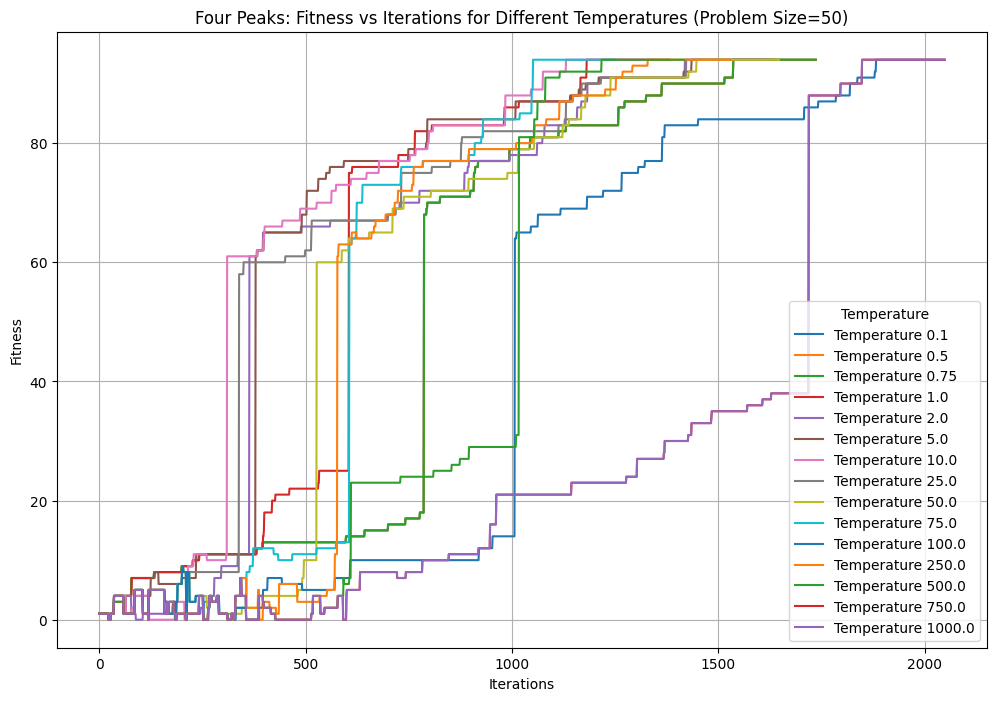

In [60]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_4peaks_temp_01_to_1000_attempts200_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=50)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


Low temperatures (0.1-25) converge quickly, at around at most 500 iterations. This suggests that the algorithm quickly settles into a solution but may get trapped in local optima due to limited exploration.

Medium-high temperatures (5-50) gradually increase in fitness over iterations. These do well with more iterations as they explore the solution space more effectively which leads to higher fitness values with more iterations.

Very high temperatures (500-1000) start slower but eventually achieve high fitness levels. The high initial temperature allows for extensive exploration and prevents early convergence. This allows it to potentially find better solutions.

In [66]:
df_temp_size50 = pd.read_csv('sa_4peaks_temp_01_to_1000_attempts200_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [67]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

Best initial temperature for a problem size of 50 is either 750 or 1000. Either option is fine because it returns the same fitness and FEval

#### graph fitness/iteration for different temperatures at problem size = 100

In [54]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_100,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()

In [55]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv', index=False)

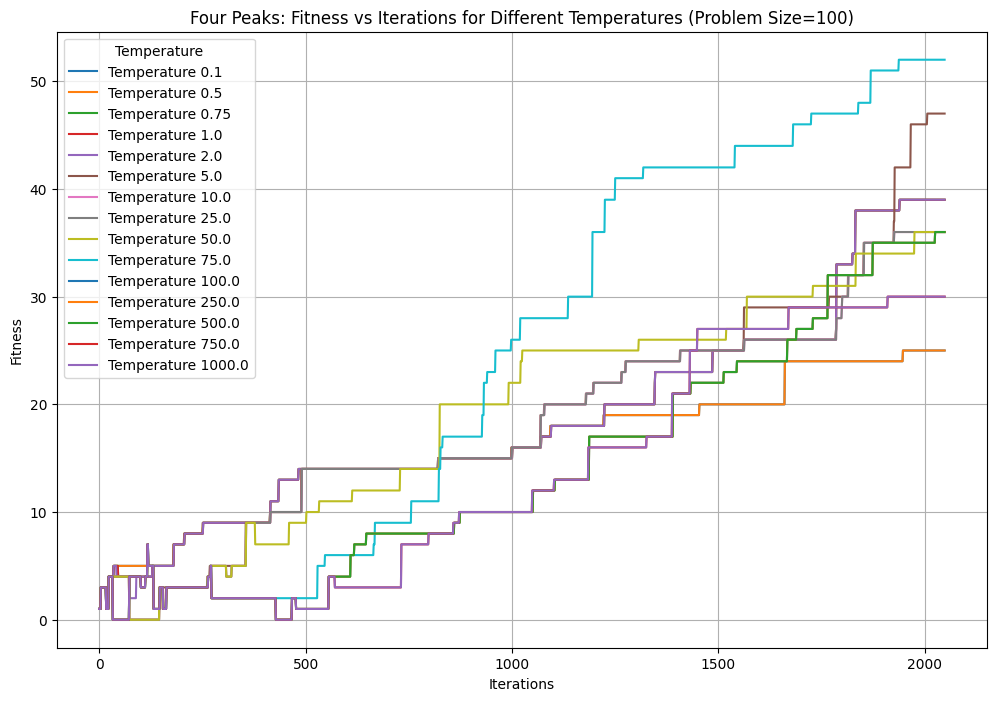

In [56]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv')
    
    # Extract and handle temperature values correctly
    df['Temperature'] = df['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df[df['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=100)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


In [68]:
df_temp_size100 = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize100_results.csv')

best_fitness = df_temp_size100['Fitness'].max()
best_runs = df_temp_size100[df_temp_size100['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [69]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

For a problem size of 100, temperature 75 is best.

#### plot fitness/iteration for diff temps (problem size=25)

In [57]:
sa_runner = mlrose.SARunner(problem=fourpeaks_problem_25,
                            experiment_name="SA_4peaks_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose_hiive.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()

In [58]:
sa_run_curves.to_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv', index=False)

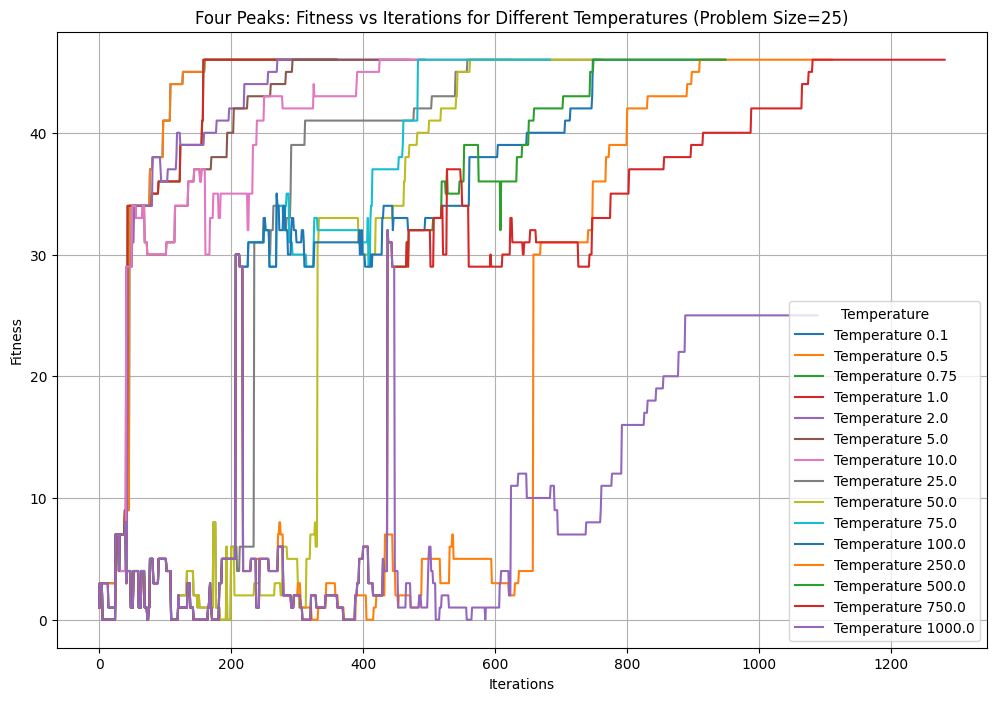

In [85]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv')
    
    # Extract and handle temperature values correctly
    df['Temperature'] = df['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df[df['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Four Peaks: Fitness vs Iterations for Different Temperatures (Problem Size=25)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_4peaks_temp_0.1_to_1000_attempts200_results.csv')


In [70]:
df_temp_size25 = pd.read_csv('sa_4peaks_temp_0.1_to_1000_problemsize25_results.csv')

best_fitness = df_temp_size25['Fitness'].max()
best_runs = df_temp_size25[df_temp_size25['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [71]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

For a problem size of 25, a temperature of 750 is best.

#### use SARunner as gridsearch to determine best decay (problem size=50, temp=750)

In [94]:
# Define decay types
decay_types = {
    'arith_decay': mlrose_hiive.ArithDecay,
    'exp_decay': mlrose_hiive.ExpDecay,
    'geom_decay': mlrose_hiive.GeomDecay
}

all_run_stats = []
all_run_curves = []

In [83]:
# Run SARunner for each decay type
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose_hiive.SARunner(
        problem=fourpeaks_problem_50,
        experiment_name=f"SA_4peaks_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[750],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_4peaks_size50_decay_combined_stats.csv', index=False)
combined_run_curves.to_csv('sa_4peaks_size50_decay_combined_curves.csv', index=False)

# Print the combined run curves to check
print(combined_run_curves.head())

   Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0          0  0.000148      1.0     0.0         750       2048  arith_decay
1          1  0.002812      1.0     2.0         750       2048  arith_decay
2          2  0.005202      1.0     4.0         750       2048  arith_decay
3          3  0.007639      1.0     6.0         750       2048  arith_decay
4          4  0.007716      1.0     8.0         750       2048  arith_decay


In [82]:
combined_run_curves

Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0             0  0.000210      1.0     0.0         750       2048  arith_decay
1             1  0.002215      1.0     2.0         750       2048  arith_decay
2             2  0.004614      1.0     4.0         750       2048  arith_decay
3             3  0.007282      1.0     6.0         750       2048  arith_decay
4             4  0.007661      1.0     8.0         750       2048  arith_decay
...         ...       ...      ...     ...         ...        ...          ...
2044       2044  0.990190     94.0  3296.0         750       2048   geom_decay
2045       2045  0.990917     94.0  3297.0         750       2048   geom_decay
2046       2046  0.991704     94.0  3298.0         750       2048   geom_decay
2047       2047  0.992566     94.0  3299.0         750       2048   geom_decay
2048       2048  0.994294     94.0  3300.0         750       2048   geom_decay

[6147 rows x 7 columns]

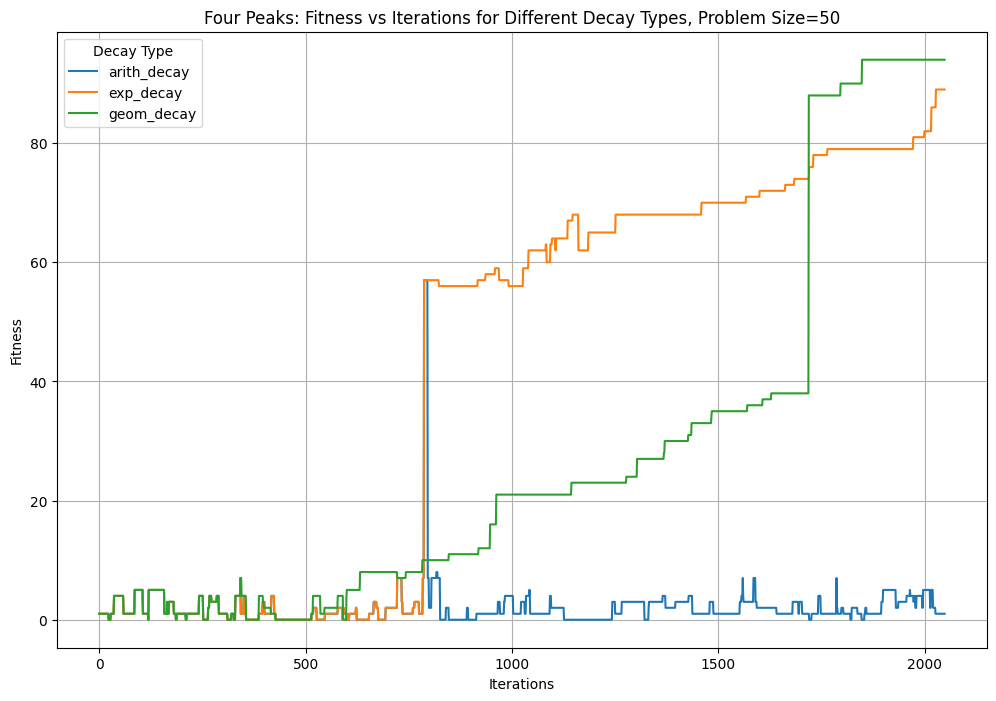

In [84]:
curve_df = pd.read_csv('sa_4peaks_size50_decay_combined_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve_df[curve_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Four Peaks: Fitness vs Iterations for Different Decay Types, Problem Size=50')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()


In [99]:
best_fitness = curve_df['Fitness'].max()
best_runs = curve_df[curve_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [100]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

For SA, temp=750, problem size=50, geom decay is the best decay.

#### determine best decay, problem size=100. best temp=75

In [87]:
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose_hiive.SARunner(
        problem=fourpeaks_problem_100,
        experiment_name=f"SA_4peaks_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[75],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_4peaks_size100_decay_combined_stats.csv', index=False)
combined_run_curves.to_csv('sa_4peaks_size100_decay_combined_curves.csv', index=False)

In [88]:
combined_run_curves

Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0             0  0.000146      1.0     0.0          75       2048  arith_decay
1             1  0.003155      1.0     2.0          75       2048  arith_decay
2             2  0.005517      1.0     4.0          75       2048  arith_decay
3             3  0.007593      1.0     6.0          75       2048  arith_decay
4             4  0.007685      3.0     8.0          75       2048  arith_decay
...         ...       ...      ...     ...         ...        ...          ...
2044       2044  1.037236     52.0  3576.0          75       2048   geom_decay
2045       2045  1.038027     52.0  3577.0          75       2048   geom_decay
2046       2046  1.038817     52.0  3579.0          75       2048   geom_decay
2047       2047  1.039565     52.0  3581.0          75       2048   geom_decay
2048       2048  1.040292     52.0  3582.0          75       2048   geom_decay

[6147 rows x 7 columns]

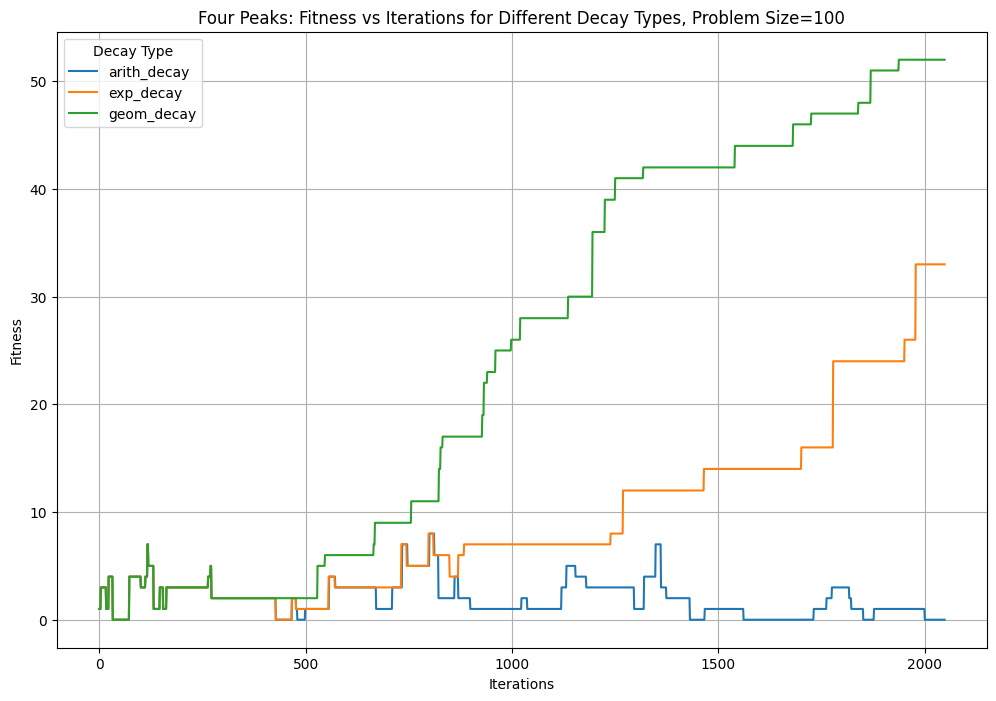

In [97]:
curve100_df = pd.read_csv('sa_4peaks_size100_decay_combined_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve100_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve100_df[curve_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Four Peaks: Fitness vs Iterations for Different Decay Types, Problem Size=100')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()


In [101]:
best_fitness = curve100_df['Fitness'].max()
best_runs = curve100_df[curve100_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [102]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

For SA, temp=75, problem size=100, geom decay is the best decay.

#### determine best decay, problem size=25. best temp=750

In [95]:
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose_hiive.SARunner(
        problem=fourpeaks_problem_25,
        experiment_name=f"SA_4peaks_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[750],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_4peaks_size25_decay_combined_stats.csv', index=False)
combined_run_curves.to_csv('sa_4peaks_size25_decay_combined_curves.csv', index=False)

In [96]:
combined_run_curves

Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0             0  0.001995      1.0     0.0         750       2048  arith_decay
1             1  0.006608      3.0     2.0         750       2048  arith_decay
2             2  0.009461      3.0     4.0         750       2048  arith_decay
3             3  0.013083      3.0     6.0         750       2048  arith_decay
4             4  0.013201      3.0     8.0         750       2048  arith_decay
...         ...       ...      ...     ...         ...        ...          ...
1277       1277  0.438784     46.0  2008.0         750       2048   geom_decay
1278       1278  0.439249     46.0  2009.0         750       2048   geom_decay
1279       1279  0.439713     46.0  2010.0         750       2048   geom_decay
1280       1280  0.440178     46.0  2011.0         750       2048   geom_decay
1281       1281  0.440642     46.0  2012.0         750       2048   geom_decay

[4966 rows x 7 columns]

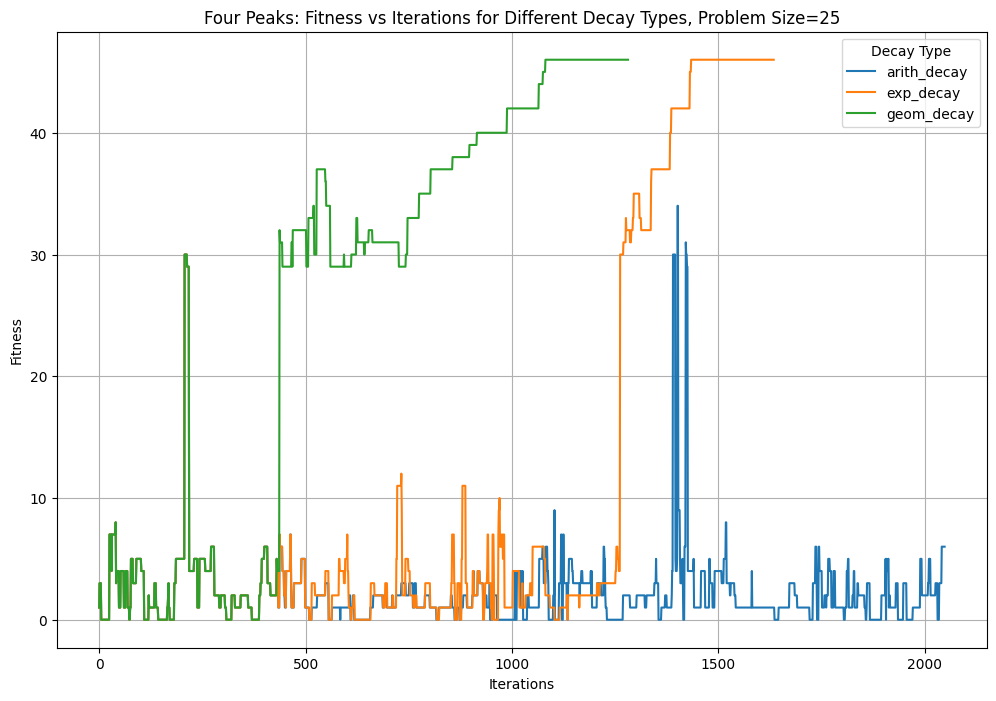

In [98]:
curve25_df = pd.read_csv('sa_4peaks_size25_decay_combined_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve25_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve25_df[curve25_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Four Peaks: Fitness vs Iterations for Different Decay Types, Problem Size=25')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()

In [103]:
best_fitness = curve25_df['Fitness'].max()
best_runs = curve25_df[curve25_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [104]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

For SA, temp=750, problem size=25, exp decay is the best decay.

#### with the best hyperparams (temp, decay) for each problem size, run across multiple seeds. average the performance and plot it.

In [105]:
# Define problem sizes, seeds, and hyperparameters determined in previous grid search 
experiments = [
    {'size': 25, 'problem': fourpeaks_problem_25, 'temp': 750, 'decay': mlrose_hiive.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 50, 'problem': fourpeaks_problem_50, 'temp': 750, 'decay': mlrose_hiive.GeomDecay, 'decay_name': 'geom_decay'},
    {'size': 100, 'problem': fourpeaks_problem_100, 'temp': 75, 'decay': mlrose_hiive.GeomDecay, 'decay_name': 'geom_decay'}
]
seeds = [55, 888, 12345]
iteration_list = 2**np.arange(12)
max_attempts = 200

all_run_stats = []
all_run_curves = []

# Run SARunner for each experiment and seed
for experiment in experiments:
    size = experiment['size']
    problem = experiment['problem']
    temp = experiment['temp']
    decay_class = experiment['decay']
    decay_name = experiment['decay_name']
    
    for seed in seeds:
        # Initialize the SARunner
        sa_runner = mlrose_hiive.SARunner(
            problem=problem,
            experiment_name=f"SA_4peaks_Size{size}_Seed{seed}_{decay_name}",
            output_directory=None,
            seed=seed,
            iteration_list=iteration_list,
            max_attempts=max_attempts,
            temperature_list=[temp],
            decay_list=[decay_class]
        )
        
        # Measure wall clock time
        start_time = time.time()
        sa_run_stats, sa_run_curves = sa_runner.run()
        end_time = time.time()
        wall_clock_time = end_time - start_time
        
        # Add metadata to the results
        sa_run_stats['Decay_Type'] = decay_name
        sa_run_stats['Problem_Size'] = size
        sa_run_stats['Seed'] = seed
        sa_run_stats['Wall_Clock_Time'] = wall_clock_time
        
        sa_run_curves['Decay_Type'] = decay_name
        sa_run_curves['Problem_Size'] = size
        sa_run_curves['Seed'] = seed
        
        # Append to the list of all results
        all_run_stats.append(sa_run_stats)
        all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_4peaks_experiments_stats.csv', index=False)
combined_run_curves.to_csv('sa_4peaks_experiments_curves.csv', index=False)

In [108]:
combined_run_curves.describe()

Iteration          Time       Fitness        FEvals  max_iters  \
count  17182.000000  17182.000000  17182.000000  17182.000000    17182.0   
mean     961.054883      0.628187     30.041613   1781.354848     2048.0   
std      562.760842      0.628392     34.889691    973.746726        0.0   
min        0.000000      0.000120      0.000000      0.000000     2048.0   
25%      477.000000      0.128526      2.000000    950.000000     2048.0   
50%      954.000000      0.447848     17.000000   1846.000000     2048.0   
75%     1431.000000      0.946136     46.000000   2624.000000     2048.0   
max     2048.000000      3.709978    131.000000   3683.000000     2048.0   

       Problem_Size          Seed  
count  17182.000000  17182.000000  
mean      60.460074   4514.187056  
std       31.156611   5640.367348  
min       25.000000     55.000000  
25%       25.000000     55.000000  
50%       50.000000    888.000000  
75%      100.000000  12345.000000  
max      100.000000  12345.000000

In [111]:
curve_df = pd.read_csv('sa_4peaks_experiments_curves.csv')
stats_df = pd.read_csv('sa_4peaks_experiments_stats.csv')

problem_sizes = [25, 50, 100]

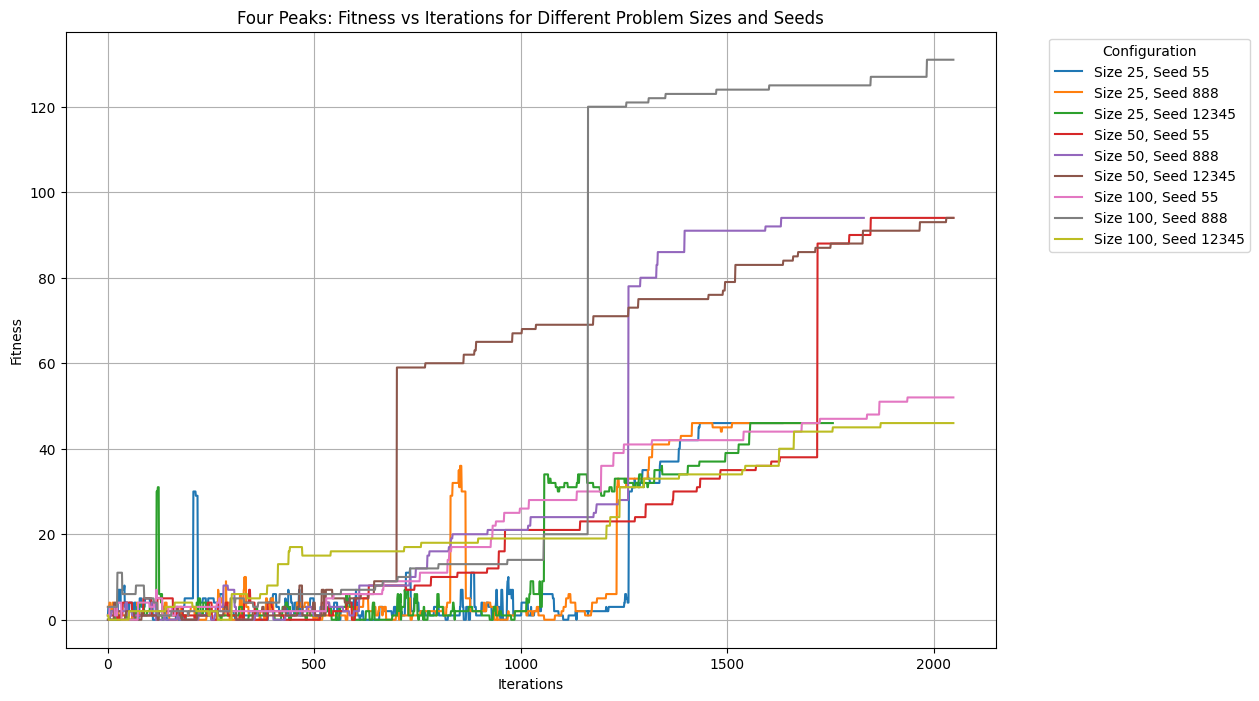

In [112]:
# Plot fitness over iterations for each problem size and seed
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    for seed in seeds:
        temp_df = curve_df[(curve_df['Problem_Size'] == size) & 
                           (curve_df['Seed'] == seed)]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Size {size}, Seed {seed}')

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Four Peaks: Fitness vs Iterations for Different Problem Sizes and Seeds')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


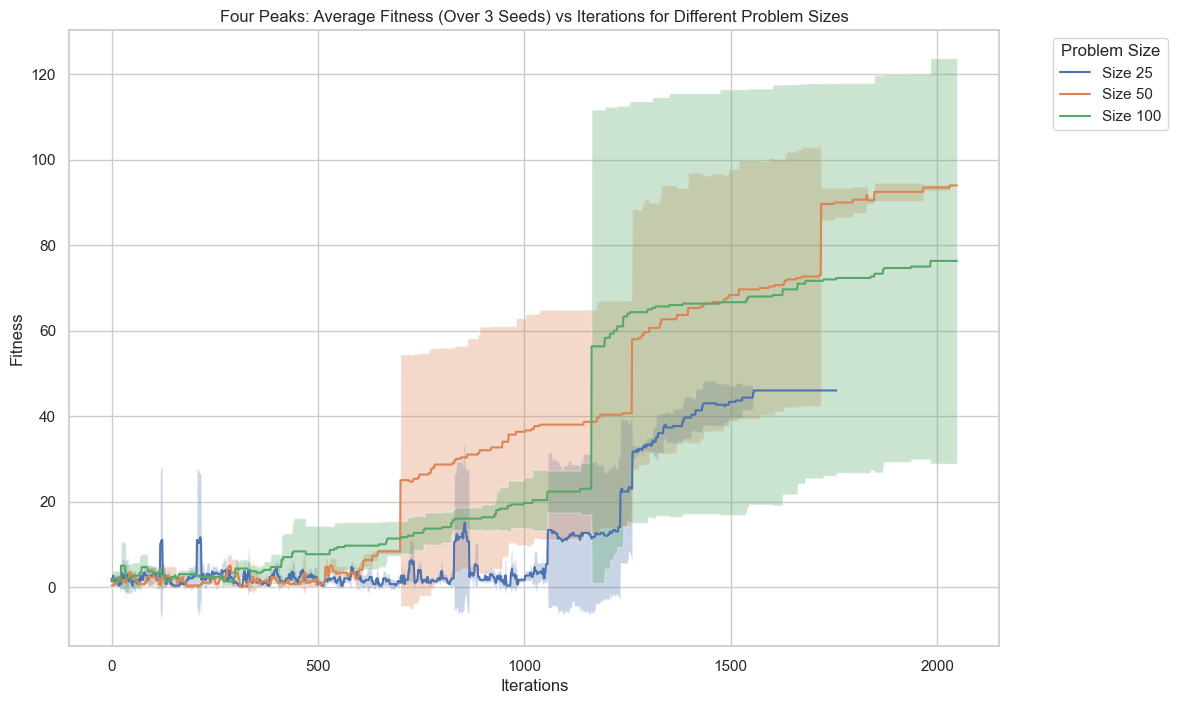

In [121]:
sns.set(style="whitegrid")

# Plot average fitness over iterations for each problem size, showing variance
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    temp_df = curve_df[curve_df['Problem_Size'] == size]
    
    # Group by iteration and calculate mean and variance for fitness
    grouped = temp_df.groupby('Iteration').agg(
        mean_fitness=('Fitness', 'mean'),
        std_fitness=('Fitness', 'std')
    ).reset_index()
    
    # Plot mean fitness with shaded error bars (standard deviation)
    sns.lineplot(x='Iteration', y='mean_fitness', data=grouped, label=f'Size {size}')
    plt.fill_between(grouped['Iteration'], grouped['mean_fitness'] - grouped['std_fitness'], 
                     grouped['mean_fitness'] + grouped['std_fitness'], alpha=0.3)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Four Peaks: Average Fitness (Over 3 Seeds) vs Iterations for Different Problem Sizes')
plt.legend(title='Problem Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

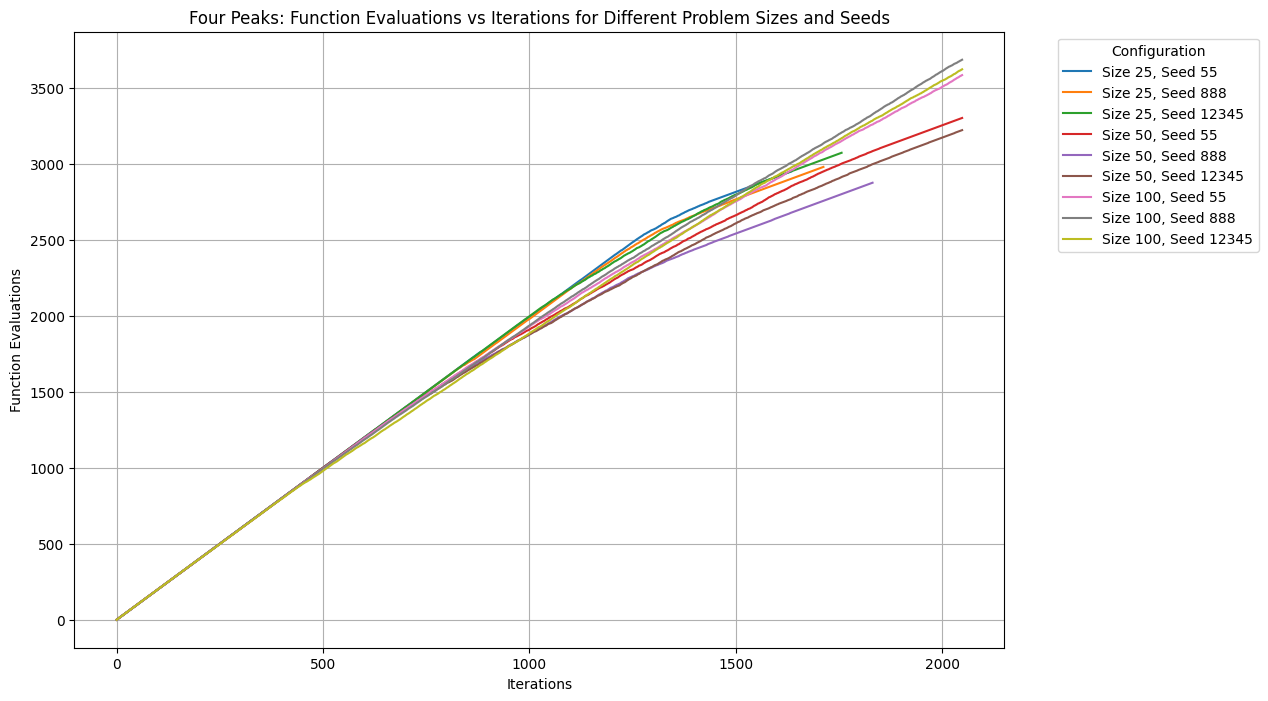

In [113]:
# Plot fevals over iterations for each problem size and seed
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    for seed in seeds:
        temp_df = curve_df[(curve_df['Problem_Size'] == size) & 
                           (curve_df['Seed'] == seed)]
        plt.plot(temp_df['Iteration'], temp_df['FEvals'], label=f'Size {size}, Seed {seed}')

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.title('Four Peaks: Function Evaluations vs Iterations for Different Problem Sizes and Seeds')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


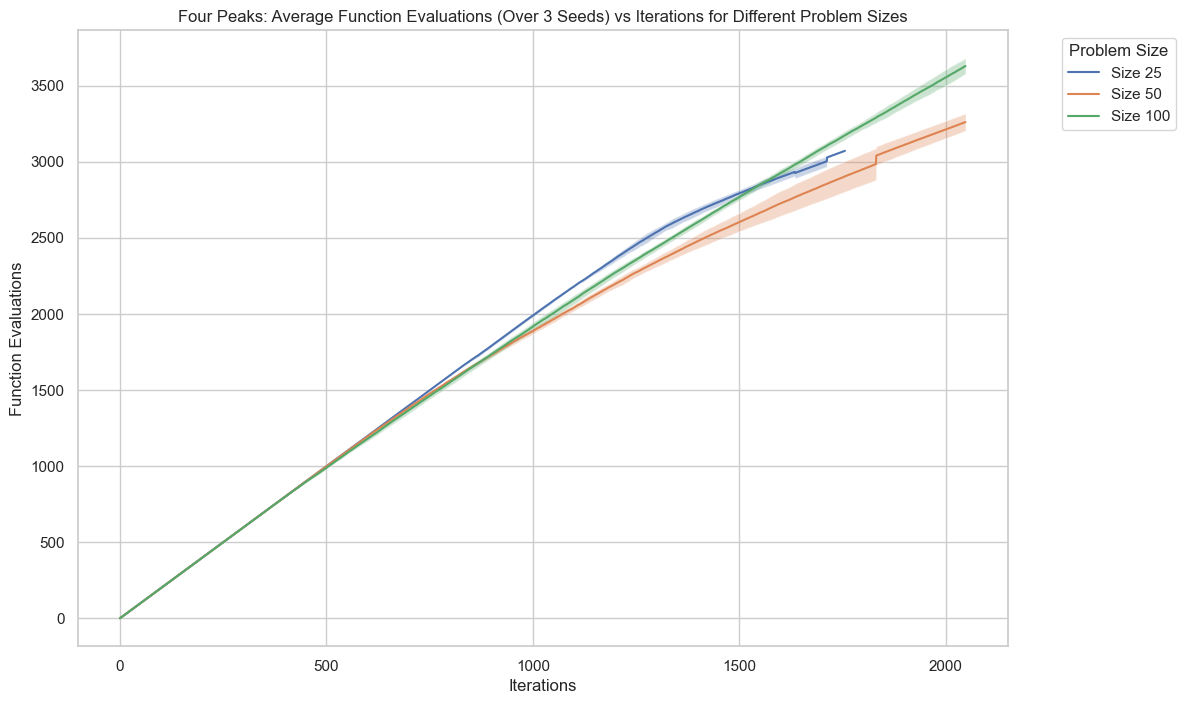

In [120]:
sns.set(style="whitegrid")

# Plot average function evaluations over iterations for each problem size, showing variance
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    temp_df = curve_df[curve_df['Problem_Size'] == size]
    
    # Group by iteration and calculate mean and variance for function evaluations
    grouped = temp_df.groupby('Iteration').agg(
        mean_fevals=('FEvals', 'mean'),
        std_fevals=('FEvals', 'std')
    ).reset_index()
    
    # Plot mean function evaluations with shaded error bars (standard deviation)
    sns.lineplot(x='Iteration', y='mean_fevals', data=grouped, label=f'Size {size}')
    plt.fill_between(grouped['Iteration'], grouped['mean_fevals'] - grouped['std_fevals'], 
                     grouped['mean_fevals'] + grouped['std_fevals'], alpha=0.3)

plt.xlabel('Iterations')
plt.ylabel('Function Evaluations')
plt.title('Four Peaks: Average Function Evaluations (Over 3 Seeds) vs Iterations for Different Problem Sizes')
plt.legend(title='Problem Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

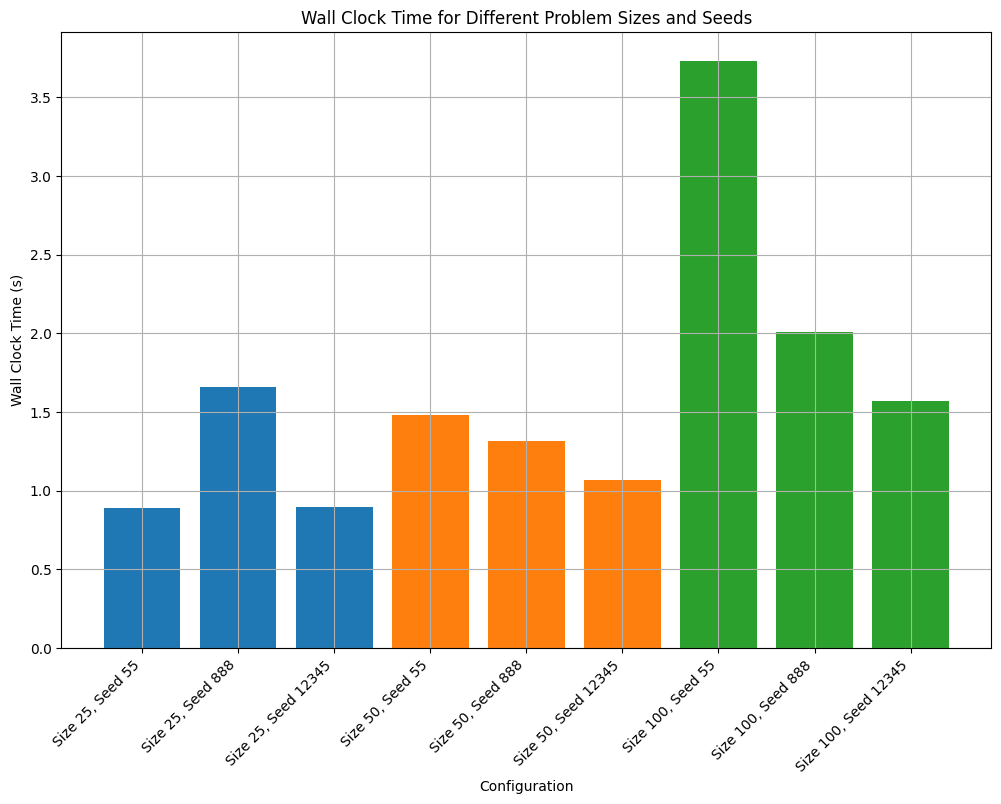

In [114]:
# Plot wall clock time for each problem size and decay type
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    temp_df = stats_df[stats_df['Problem_Size'] == size]
    mean_wall_clock_time = temp_df.groupby('Seed')['Wall_Clock_Time'].mean()
    plt.bar([f'Size {size}, Seed {seed}' for seed in seeds], mean_wall_clock_time.values)

plt.xlabel('Configuration')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time for Different Problem Sizes and Seeds')
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

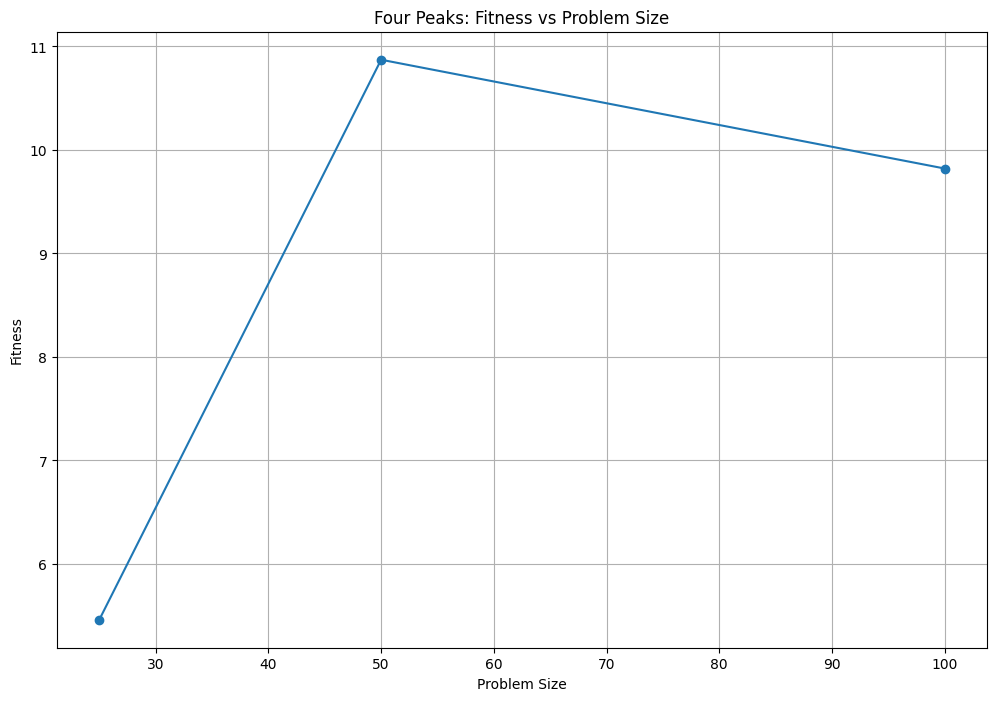

In [115]:
# Plot fitness vs problem size
plt.figure(figsize=(12, 8))

mean_fitness = stats_df.groupby('Problem_Size')['Fitness'].mean()
plt.plot(mean_fitness.index, mean_fitness.values, marker='o')

plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Four Peaks: Fitness vs Problem Size')
plt.grid(True)
plt.show()
